K means is clustering algorithm.
k is parameter , centre of cluster. Ex. k=2

start with random k , then compute SSE(sum of squared error for each cluster), then find total SSE. Draw plot.
as you increase number of clusters , error will be less.

Find the elbow in plot, and that number is your good k.

K means used in 
1. Market segmentation
2. Image compression
3. Anomaly detection
4. Document clustering 
5. Recommendation System 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


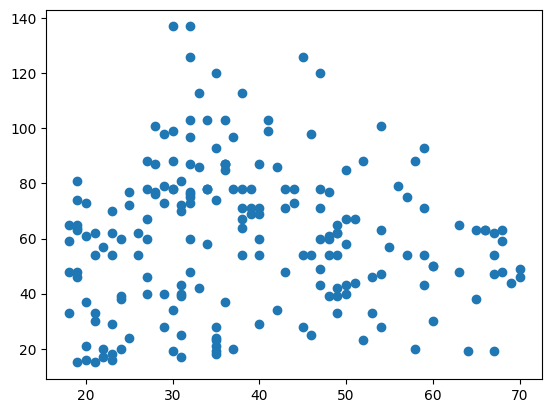

In [27]:
plt.scatter(df['Age'],df['Annual Income (k$)'])

In [28]:
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
%matplotlib inline

In [29]:
km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [30]:
y_pred = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_pred

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [31]:
df['cluster'] = y_pred
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [32]:
km.cluster_centers_

array([[109.7       ,  22.        ],
       [ 25.72727273,  79.36363636],
       [ 86.53846154,  82.12820513],
       [ 48.16831683,  43.3960396 ],
       [ 78.89285714,  17.42857143]])

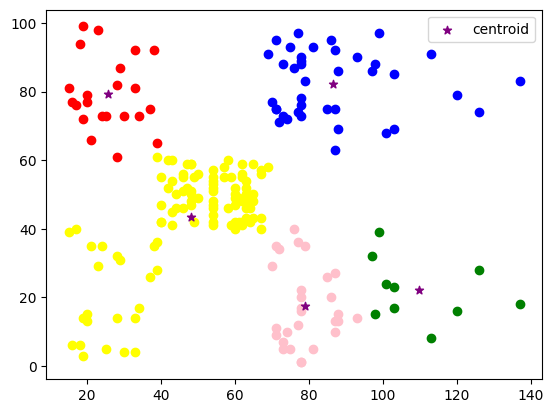

In [33]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'], color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'], color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'], color='blue')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'], color='yellow')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'], color='pink')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color= 'purple',marker='*',label='centroid')
plt.legend()

In [37]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

In [38]:
sse

[269981.28,
 185140.01649305553,
 106348.37306211119,
 99458.83963720276,
 44448.45544793371,
 37455.98455516028,
 31644.319037920202,
 26449.910028179365,
 24925.238250066177]

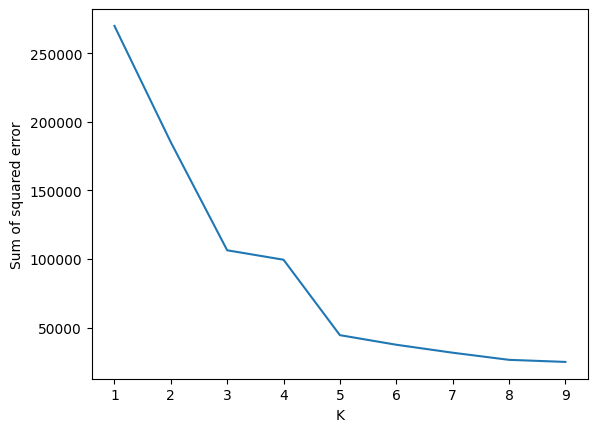

In [39]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)